# Thompson Sampling

## Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [46]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [47]:
import random
from collections import namedtuple
Thompson_Sampling_Result = namedtuple('Thompson_Sampling_Result', ['Ads_Selected', 'Ad_Results', 'Total_Reward'])
from numpy.typing import ArrayLike

def Thompson_Sampling(data: pd.DataFrame)-> Thompson_Sampling_Result:
    """Simulate the Thompson Sampling algorithm for a multi-armed bandit problem.

    Args:
        data (pd.DataFrame): A 2D array-like structure where each row represents a trial and each column represents an ad.

    Returns:
        Thompson_Sampling_Result: A named tuple containing:
            - Ads_Selected: List of ads selected in each trial.
            - Ad_Results: Dictionary with ad indices as keys and a list of [times selected, successes, failures] as values.
            - Total_Reward: Total reward obtained from all trials.
    """

    N = data.shape[0]
    d = data.shape[1]
    ads_Selected = []
    total_reward = 0
    ad_Resules = {i:[0,0,0] for i in range(d)} #fist index times selected, second number of successes, third number of failures

    for n in range(N):
        random_sampling = {i:random.betavariate(ad_Resules[i][1]+1, ad_Resules[i][2]+1) for i in range(d)}
        ad = max(random_sampling, key=random_sampling.get)
        ads_Selected.append(ad)
        reward = data.values[n, ad]
        if reward == 1:
            ad_Resules[ad][1] += 1
        else:
            ad_Resules[ad][2] += 1
        total_reward += reward
    return Thompson_Sampling_Result(ads_Selected, ad_Resules, total_reward)

In [48]:
result = Thompson_Sampling(dataset)
print(f"Total Reward: {result.Total_Reward}")

Total Reward: 2590


## Visualising the results - Histogram

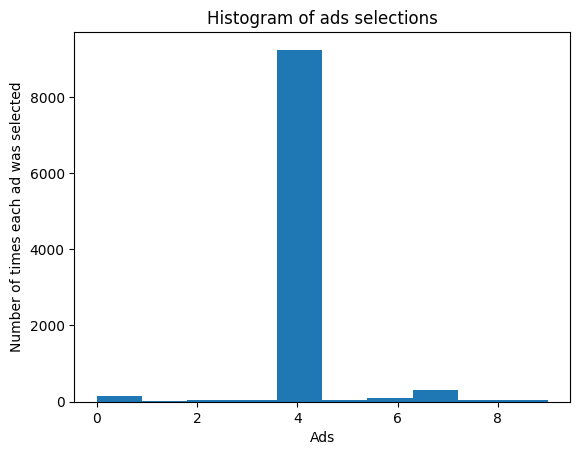

In [49]:
plt.hist(result.Ads_Selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Visualising The Results - Rewards Per Ad

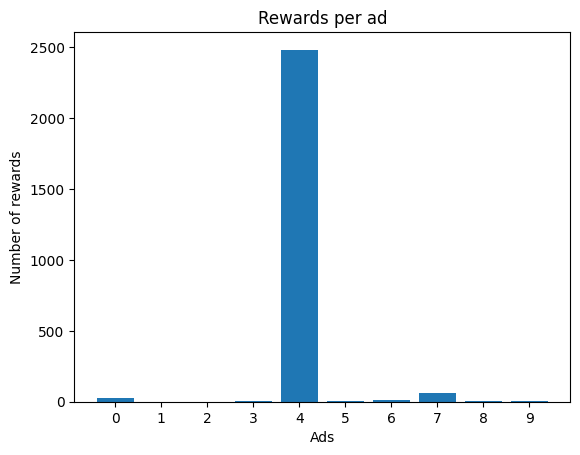

In [50]:
rewards_per_ad = list(map(lambda x: x[1][1], sorted(result.Ad_Results.items(), key = lambda x: x[0])))

plt.bar(range(len(rewards_per_ad)), rewards_per_ad, tick_label=sorted(result.Ad_Results.keys()))
plt.title('Rewards per ad') 
plt.xlabel('Ads')
plt.ylabel('Number of rewards')
plt.show()